In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


Vaqt seriyasini prognozlash kelajakdagi qarorlarni qabul qilish uchun vaqt seriyasidagi ma'lumotlarni tahlil qilish va modellashtirishni anglatadi. Vaqt seriyalarini bashorat qilishning ba'zi ilovalari ob-havo prognozi, savdo prognozi, biznes prognozi, aksiyalar narxini prognozlash va boshqalardir. ARIMA modeli vaqt seriyasini prognozlash uchun ishlatiladigan mashhur statistik texnikadir. Agar siz ARIMA bilan vaqt seriyasini prognoz qilishni o'rganmoqchi bo'lsangiz, ushbu maqola siz uchun. Ushbu maqolada men sizga Python dasturlash tilidan foydalangan holda ARIMA bilan vaqt seriyasini prognozlash vazifasini bajaraman.

In [3]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

          Date        Open        High         Low       Close   Adj Close  \
247 2022-09-07  107.760002  110.989998  107.614998  110.480003  110.480003   
248 2022-09-08  109.180000  110.580002  108.059998  109.419998  109.419998   
249 2022-09-09  110.050003  112.000000  110.000000  111.779999  111.779999   
250 2022-09-12  111.989998  112.639999  110.930000  111.870003  111.870003   
251 2022-09-13  108.889999  109.370003  105.000000  105.309998  105.309998   

       Volume  
247  22987200  
248  21660700  
249  21732900  
250  19732900  
251  32987000  


ARIMA nima?
ARIMA avtoregressiv integratsiyalashgan harakatlanuvchi o'rtachani anglatadi. Bu vaqt seriyasi ma'lumotlarini prognoz qilish uchun ishlatiladigan algoritm. ARIMA modellarida ARIMA (p, d, q) kabi uchta parametr mavjud. Bu erda p, d va q quyidagicha aniqlanadi:

p - qiymatlarga qo'shilishi yoki olib tashlanishi kerak bo'lgan kechiktirilgan qiymatlar soni (yorliq ustuni). U ARIMA ning avtoregressiv qismini qamrab oladi.
d statsionar signalni ishlab chiqarish uchun ma'lumotlarning necha marta farqlanishi kerakligini ifodalaydi. Agar u statsionar ma'lumotlar bo'lsa, d qiymati 0 bo'lishi kerak va mavsumiy ma'lumotlar bo'lsa, d qiymati 1 bo'lishi kerak. d ARIMA ning birlashtirilgan qismini qamrab oladi.
q – qiymatlarga qo‘shilgan yoki ayirib tashlangan xato atamasi uchun kechikkan qiymatlar soni (yorliq ustuni). U ARIMA ning harakatlanuvchi o'rtacha qismini ushlaydi.
Umid qilamanki, siz endi ARIMA modelini tushundingiz. Quyidagi bo'limda men sizga Python dasturlash tilidan foydalangan holda ARIMA yordamida aktsiyalar narxlarini vaqt seriyali prognozlash vazifasini bajaraman.

ARIMA bilan vaqt seriyasini prognozlash
Endi ARIMA bilan vaqt seriyasini prognozlash vazifasidan boshlaylik. Men birinchi navbatda Yahoo Finance API yordamida Google aksiyalari narxi maʼlumotlarini toʻplayman. Agar siz hech qachon Yahoo Finance API-dan foydalanmagan bo'lsangiz, bu haqda ko'proq ma'lumot olishingiz mumkin .

Endi Google aksiyalari narxi haqidagi maʼlumotlarni qanday yigʻish mumkin

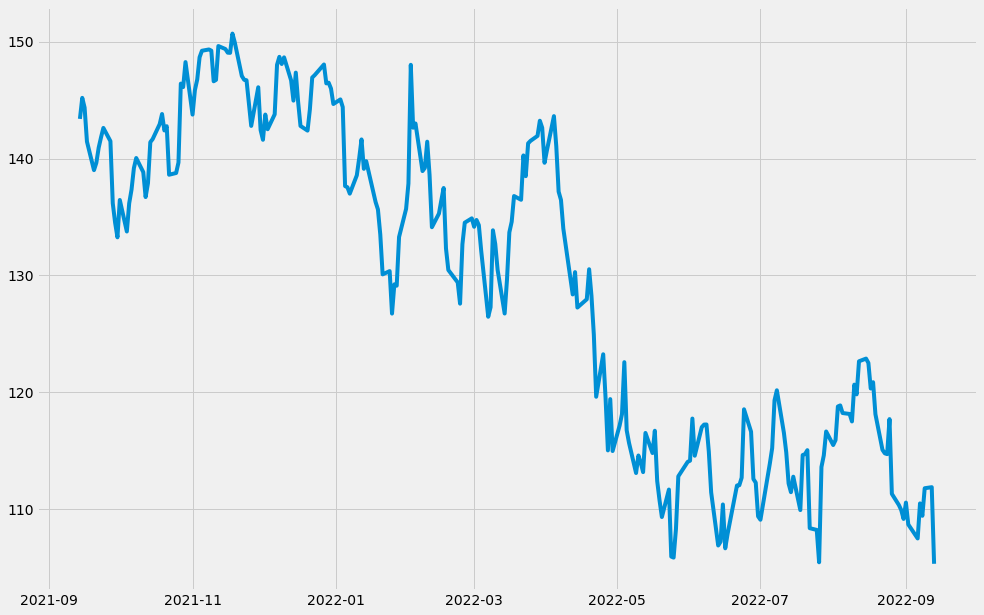

In [4]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

Vazifaning qolgan qismi uchun bizga faqat sana va yopilish narxlari ustunlari kerak, shuning uchun ikkala ustunni tanlab, davom etaylik:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

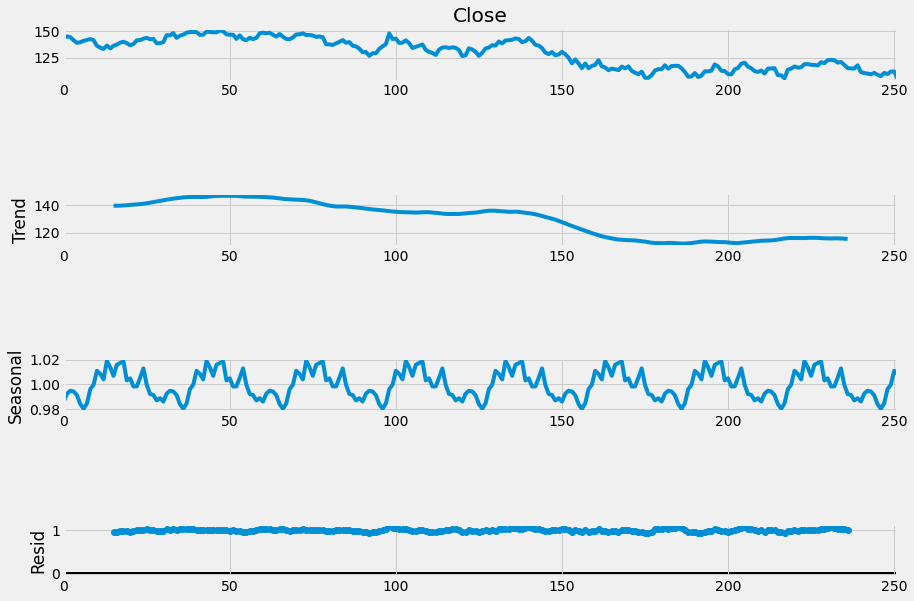

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], 
                            model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

Vaqt seriyalarini bashorat qilish uchun ARIMA-dan foydalanish
ARIMA modelidan foydalanishdan oldin maʼlumotlarimiz statsionar yoki mavsumiy ekanligini aniqlashimiz kerak. Yuqoridagi yopilish aktsiyalari narxlari haqidagi ma'lumotlarni vizualizatsiya qilish grafigi bizning ma'lumotlar to'plamimiz statsionar emasligini ko'rsatadi. Ma'lumotlar to'plamimiz to'g'ri statsionar yoki mavsumiy ekanligini tekshirish uchun vaqt seriyasi ma'lumotlarini yaxshiroq tushunish uchun vaqt seriyasi ma'lumotlarini trend, mavsumiy va qoldiqlarga ajratadigan mavsumiy dekompozitsiya usulidan foydalanishimiz mumkin:

Shunday qilib, bizning ma'lumotlarimiz statsionar emas, balki mavsumiydir. Ushbu ma'lumotlar bo'yicha vaqt seriyasini prognozlash uchun mavsumiy ARIMA (SARIMA) modelidan foydalanishimiz kerak. Ammo SARIMA modelidan foydalanishdan oldin biz ARIMA modelidan foydalanamiz. Bu ikkala modeldan foydalanishni o'rganishga yordam beradi.

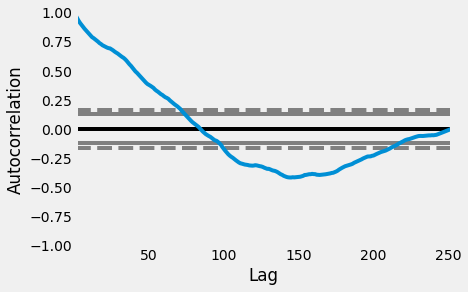

In [6]:
pd.plotting.autocorrelation_plot(data["Close"])

ARIMA yoki SARIMA dan foydalanish uchun biz p, d va q qiymatlarini topishimiz kerak. Biz p qiymatini Yopish ustunining avtokorrelyatsiyasini va q qiymatini qisman avtokorrelyatsiya grafigini topishimiz mumkin. d qiymati 0 yoki 1. Agar ma'lumotlar statsionar bo'lsa, biz 0 dan foydalanishimiz kerak, agar ma'lumotlar mavsumiy bo'lsa, biz 1 dan foydalanishimiz kerak. Bizning ma'lumotlarimiz mavsumiy bo'lgani uchun d qiymati sifatida 1 dan foydalanishimiz kerak.

Endi p qiymatini qanday topish mumkin:

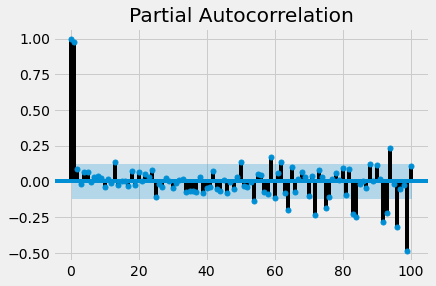

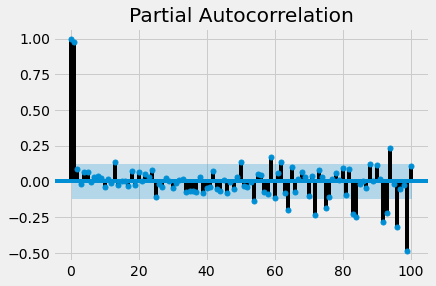

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

Yuqoridagi avtokorrelyatsiya chizmasida egri chiziq birinchi chegaraning 5-chizigidan keyin pastga siljiydi. P-qiymatini shunday aniqlash mumkin. Demak, p ning qiymati 5 ga teng. Endi q qiymatini (harakatlanuvchi o'rtacha) topamiz:

In [8]:
p, d, q = 5, 1, 2
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data["Close"], order=(p,d,q))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  251
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -601.443
Method:                       css-mle   S.D. of innovations              2.641
Date:                Wed, 14 Sep 2022   AIC                           1220.885
Time:                        10:10:57   BIC                           1252.614
Sample:                             1   HQIC                          1233.654
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1591      0.029     -5.423      0.000      -0.217      -0.102
ar.L1.D.Close    -0.0830      0.064     -1.301      0.193      -0.208       0.042
ar.L2.D.Close     0.9696      0.064     

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Yuqoridagi qisman avtokorrelyatsiya syujetida biz faqat ikkita nuqta barcha nuqtalardan uzoqda ekanligini ko'rishimiz mumkin. q qiymatini shunday aniqlash mumkin. Demak, q qiymati 2 ga teng. Endi ARIMA modelini tuzamiz

In [9]:
predictions = fitted.predict()
print(predictions)

2     -0.274475
3     -0.093155
4     -0.222386
5     -0.034244
6      0.067125
         ...   
247   -0.043917
248   -0.291492
249    0.216887
250   -0.747511
251   -0.044560
Length: 250, dtype: float64


ARIMA modeli yordamida qiymatlarni qanday taxmin qilish mumkin:

In [10]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  252
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -590.574
Date:                            Wed, 14 Sep 2022   AIC                           1211.148
Time:                                    10:15:12   BIC                           1263.295
Sample:                                         0   HQIC                          1232.162
                                            - 252                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0879      0.242     -0.363      0.716      -0.562       0.386
ar.L2          0.9531      0.211   

Prognoz qilingan qiymatlar noto'g'ri, chunki ma'lumotlar mavsumiydir. ARIMA modeli hech qachon mavsumiy vaqt seriyalari ma'lumotlarida yaxshi ishlamaydi. Shunday qilib, SARIMA modelini qanday yaratish mumkin:

In [11]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

252    105.772598
253    105.050469
254    107.740505
255    107.265182
256    106.369341
257    106.459249
258    106.524355
259    106.326010
260    105.106891
261    104.811449
262    104.971333
Name: predicted_mean, dtype: float64


Endi keling, keyingi 10 kun davomida SARIMA modelidan foydalanib, kelajakdagi aktsiya narxlarini bashorat qilaylik:

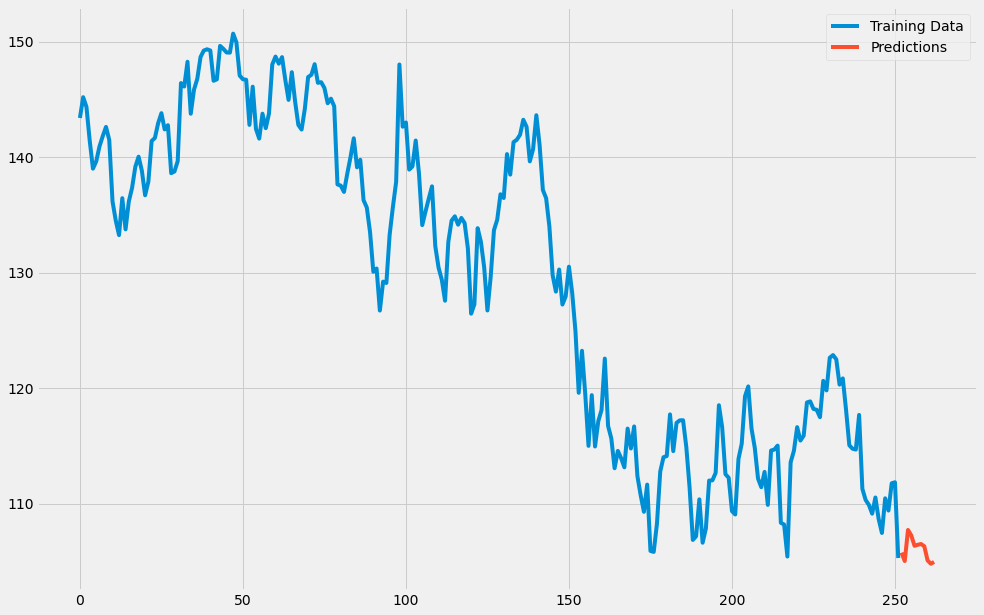

In [14]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

Bashoratlarni qanday tuzish mumkin:

Shunday qilib, Python yordamida vaqt seriyasini prognozlash uchun ARIMA yoki SARIMA modellaridan foydalanishingiz mumkin.

Xulosa
ARIMA avtoregressiv integratsiyalashgan harakatlanuvchi o'rtachani anglatadi. Bu vaqt seriyasi ma'lumotlarini prognoz qilish uchun ishlatiladigan algoritm. Agar ma'lumotlar statsionar bo'lsa, biz ARIMA-dan foydalanishimiz kerak, agar ma'lumotlar mavsumiy bo'lsa, mavsumiy ARIMA (SARIMA) dan foydalanishimiz kerak. Python yordamida ARIMA bilan vaqt seriyasini prognozlash haqidagi ushbu maqola sizga yoqdi deb umid qilaman. Quyidagi sharhlar bo'limida qimmatli savollarni so'rashingiz mumkin.